In [1]:
require(rstan)
require(plyr)
require(ggplot2)
require(reshape2)

Loading required package: rstan
Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.15.1, packaged: 2017-04-19 05:03:57 UTC, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())
Loading required package: plyr
Loading required package: reshape2


In [2]:
x1 <- c(-4, -3, -1, 0, 2)
y1 <- c(-2, 0, 1, 2, -1)
N1<-length(x1)
x <- seq(-5, 5, 0.2)
N2 <- length(x)
x2<-x

eta_sq=1
rho_sq=0.5
sigma_sq=0.0001

In [3]:
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())

In [4]:
stanfit <- stan("MTH225_Spring2017/Gaussian_process2.stan", iter=200, chains=3)
pd <- extract(stanfit, permuted=TRUE)

str(pd)

In file included from /usr/lib64/R/library/RcppEigen/include/Eigen/Core:276:0,
                 from /usr/lib64/R/library/RcppEigen/include/Eigen/Dense:1,
                 from /usr/lib64/R/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:4,
                 from /usr/lib64/R/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4,
                 from /usr/lib64/R/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4,
                 from /usr/lib64/R/library/StanHeaders/include/stan/math/rev/core.hpp:14,
                 from /usr/lib64/R/library/StanHeaders/include/stan/math/rev/mat.hpp:4,
                 from /usr/lib64/R/library/StanHeaders/include/stan/math.hpp:4,
                 from /usr/lib64/R/library/StanHeaders/include/src/stan/model/model_header.hpp:4,
                 from file52b3711ed1b0.cpp:8:
/usr/lib64/R/library/RcppEigen/include/Eigen/src/Core/Functors.h:973:28: warning: ‘template<class _Operation> class std::binder2nd’ is 

Warning message:
“There were 51 transitions after warmup that exceeded the maximum treedepth. Increase max_treedepth above 10. See
http://mc-stan.org/misc/warnings.html#maximum-treedepth-exceeded”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”

List of 2
 $ y2  : num [1:300, 1:51] -1.952 -0.884 -1.813 -3.442 -1.751 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ iterations: NULL
  .. ..$           : NULL
 $ lp__: num [1:300(1d)] -30.2 -32.6 -26.4 -33.7 -25.3 ...
  ..- attr(*, "dimnames")=List of 1
  .. ..$ iterations: NULL


Using X1 as id variables


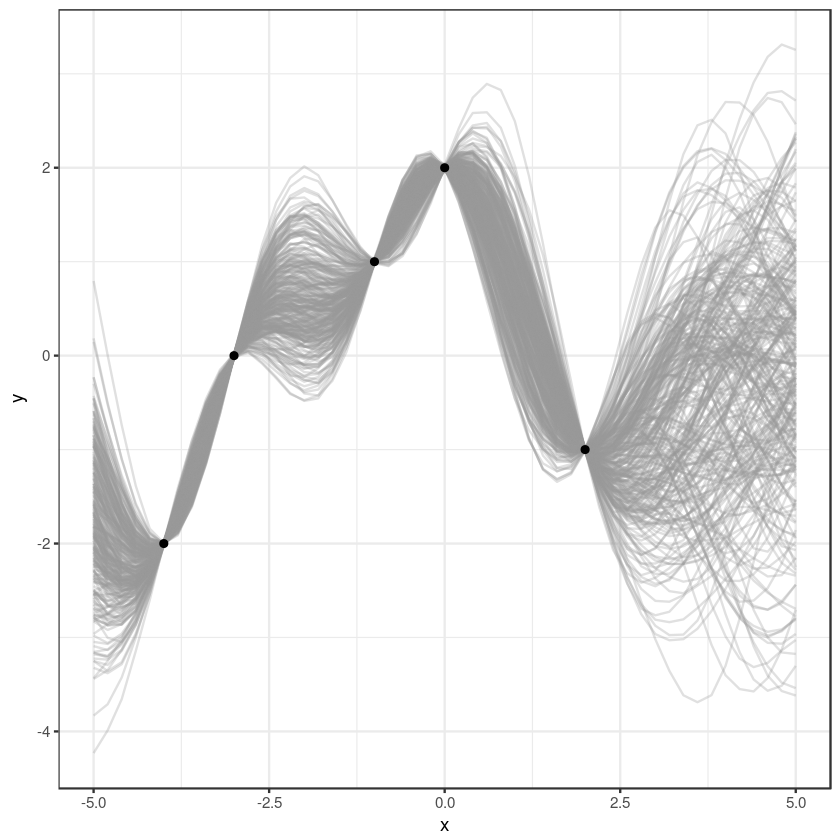

In [5]:
data <- adply(pd$y, 2)
tmp <- melt(data)
names(tmp) <- c("xid", "group", "y")
tmp <- mutate(tmp, x=x[xid])
fig2b <- ggplot(tmp, aes(x=x, y=y)) +
  geom_line(aes(group=group), colour="#999999", alpha=0.3) +
  theme_bw() +
  geom_point(data=data.frame(x=x1, y=y1))
fig2b